In [1]:
# Dependencies
import csv
import os
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from config import api_key

In [2]:
# Create basic URL, set units to metric
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build the query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=3866f5856bec34ecc13aca48299f973e&units=imperial&q='

In [25]:
#pull cities from world cities database
citiesCSV = pd.read_csv('Resources/worldcitiespopulation.csv')
# remove all columns except 'city'
citiesSeries = citiesCSV['City']
# # pull a random sample of cities
cities = citiesSeries.sample(n=20)
cities.values.tolist()
    
# set up lists to hold reponse info
lat = []
temp = [] #fahrenheit
humidity = [] #as a percentage
cloudiness = [] #as a percentage
windSpeed = [] #mph

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all']/100)
        windSpeed.append(response['wind']['speed'])
        print(f"Getting information for {city}")
    except:
        print("One of the cities wasn't in the Open Weather Map database")

print(f"There are " + str(len(lat)) + " values in the dataset")
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The humidity information received is: {humidity}")
print(f"The cloudiness information received is: {cloudiness}")
print(f"The wind speed information received is: {windSpeed}")

Getting information for aksu
Getting information for munich
Getting information for ponta grossa
Getting information for gelsenkirchen
Getting information for serra
Getting information for bujumbura
Getting information for jinzhou
Getting information for palma
Getting information for ananindeua
Getting information for shanghai
Getting information for chengdu
Getting information for maroua
Getting information for bogota
Getting information for coventry
Getting information for guarulhos
Getting information for tongchuan
Getting information for zhanjiang
Getting information for halle
Getting information for juiz de fora
Getting information for bengbu
There are 20 values in the dataset
The latitude information received is: [52.04, 48.14, -25.09, 51.51, -20.13, -3.36, 41.11, -5.02, -1.37, 31.23, 30.68, 10.6, 4.6, 52.41, -23.44, 34.9, 21.2, 50.74, -21.76, 32.92]
The temperature information received is: [-7.61, 33.8, 82.01, 44.01, 80.6, 62.03, 19.33, 81.65, 75.2, 41, 32, 75.2, 64.4, 50.56, 76

In [26]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windSpeed": windSpeed
}
weather_data = pd.DataFrame(weather_dict)

# Save weather dictionary as a csv file
weather_data.to_csv('weather_data_by_city.csv')
weather_data

,city,lat,temp,humidity,cloudiness,windSpeed
357,aksu,52.04,-7.61,83,0.00,4.47
80,munich,48.14,33.80,100,0.75,25.28
416,ponta grossa,-25.09,82.01,68,0.44,3.36
449,gelsenkirchen,51.51,44.01,87,0.75,10.29
308,serra,-20.13,80.60,78,0.40,8.05
369,bujumbura,-3.36,62.03,100,0.48,2.13
192,jinzhou,41.11,19.33,59,0.00,9.40
324,palma,-5.02,81.65,69,0.32,3.80
280,ananindeua,-1.37,75.20,88,0.75,6.93
0,shanghai,31.23,41.00,80,0.75,6.71


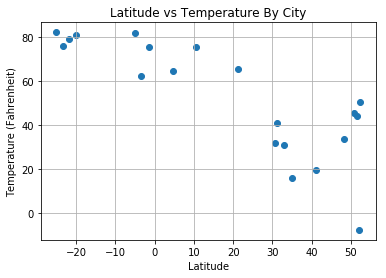

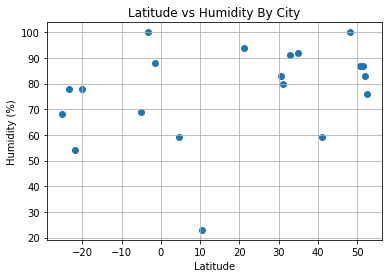

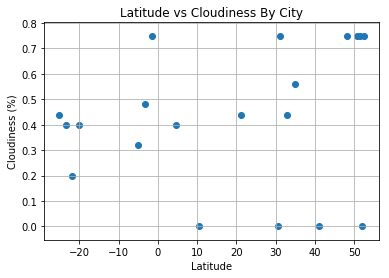

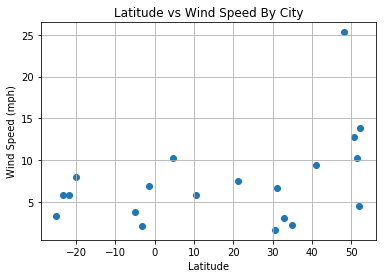

In [27]:
# Building graphs with a loop
titles = ["Latitude vs Temperature By City","Latitude vs Humidity By City","Latitude vs Cloudiness By City","Latitude vs Wind Speed By City"]
yLabels = ["Temperature (Fahrenheit)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]
dfHeaders = ["temp","humidity","cloudiness","windSpeed"]

x=[weather_data["lat"]]
y=[weather_data["temp"],weather_data["humidity"],weather_data["cloudiness"],weather_data["windSpeed"]]

for i in range(len(y)):
    plt.figure()
    plt.scatter(x,y[i])
    plt.title(titles[i])
    plt.xlabel("Latitude")
    plt.ylabel(yLabels[i])    
    plt.grid(True)
    plt.savefig(titles[i] + ".png")

In [ ]:
Observable trends based on the data

1. Cities with latitude -25 < x < 20 are significantly warmer than those between 30 < x < 50
2. As latitude increases, humidity generally increases
3. At the time of sampling, wind speed does not appear to be correlated with latitude